In [1]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!ls -lh /content/



total 8.0K
drwx------ 5 root root 4.0K Aug 31 09:40 drive
drwxr-xr-x 1 root root 4.0K Aug 28 13:43 sample_data


In [3]:
import time

start = time.time()

!cp /content/drive/MyDrive/Dataset.zip /content/

end = time.time()
print(f"Copy completed in {round(end - start, 2)} seconds")



Copy completed in 33.78 seconds


In [4]:
import zipfile

with zipfile.ZipFile("Dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("Dataset")


In [5]:
base_path = '/content/Dataset/Dataset'

train_csv = f'{base_path}/all_train/train_merged.csv'
test_csv = f'{base_path}/all_test/test_category.csv'
train_dir = f'{base_path}/all_train/train'
test_dir = f'{base_path}/all_test/test'


In [6]:
# 2. Import packages
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os

# 3. Parameter configuration
IMAGE_RESIZE = 224
BATCH_SIZE_TRAINING = 64
BATCH_SIZE_VALIDATION = 64
NUM_EPOCHS = 20
STEPS_PER_EPOCH_TRAINING = 10
STEPS_PER_EPOCH_VALIDATION = 10
#4. Load training CSV (ensure column names are consistent)
train_df = pd.read_csv(train_csv)
train_df['label'] = train_df['label'].astype(str)  # convert to string for binary mode compatibility

In [7]:
# Confusion matrix visualization
def plot_confusion_matrix(y_true, y_pred, category_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        cbar=False,
        xticklabels=['Human', 'AI'],
        yticklabels=['Human', 'AI']
    )
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(f'Confusion Matrix: {category_name}')
    plt.tight_layout()
    plt.show()


In [8]:
# 5. Image data generator
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)


In [9]:
# 6. Model tracking (no saving)
best_val_acc = 0.0
best_model = None



Fold 1/5
Found 24004 validated image filenames belonging to 2 classes.
Found 6002 validated image filenames belonging to 2 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 125s 299ms/step - accuracy: 0.7502 - loss: 0.5062 - val_accuracy: 0.9373 - val_loss: 0.1770
Epoch 2/20
  1/375 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.8906 - loss: 0.2757

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.8906 - loss: 0.2757 - val_accuracy: 0.9373 - val_loss: 0.1768
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 99s 265ms/step - accuracy: 0.9171 - loss: 0.2119 - val_accuracy: 0.9461 - val_loss: 0.1443
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.8906 - loss: 0.2100 - val_accuracy: 0.9466 - val_loss: 0.1441
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 99s 265ms/step - accuracy: 0.9361 - loss: 0.1671 - val_accuracy: 0.9563 - val_loss: 0.1187
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9219 - loss: 0.2849 - val_accuracy: 0.9563 - val_loss: 0.1187
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 98s 262ms/step - accuracy: 0.9428 - loss: 0.1468 - val_accuracy: 0.9595 - val_loss: 0.1104
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.9375 - loss: 0.1450 - val_accuracy: 0.9597 - val_loss: 0.1105
Epoch 9/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 100s 267ms/step - accuracy: 0.9508 - loss: 0.1321 - val_ac

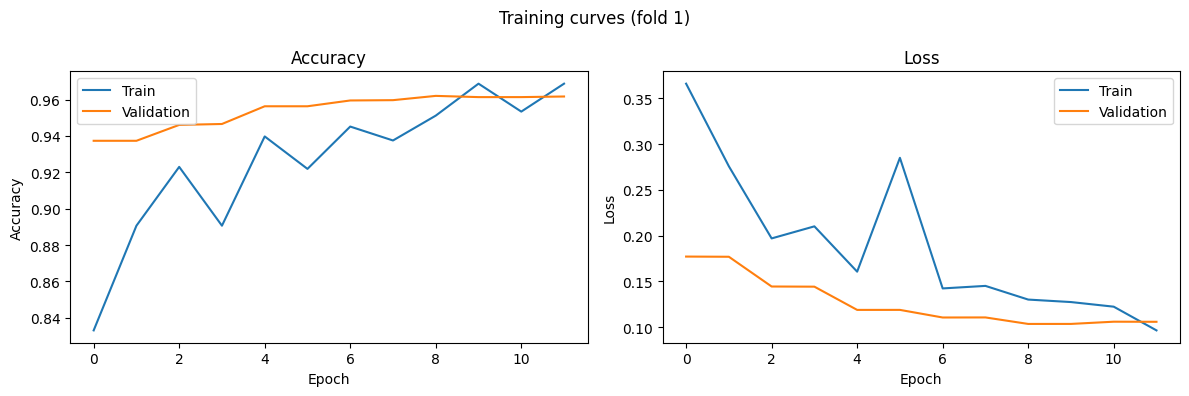


Fold 2/5
Found 24005 validated image filenames belonging to 2 classes.
Found 6001 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 118s 287ms/step - accuracy: 0.7288 - loss: 0.5626 - val_accuracy: 0.9360 - val_loss: 0.1735
Epoch 2/20
  1/375 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9062 - loss: 0.2949

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.9062 - loss: 0.2949 - val_accuracy: 0.9368 - val_loss: 0.1735
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 101s 268ms/step - accuracy: 0.9097 - loss: 0.2223 - val_accuracy: 0.9516 - val_loss: 0.1318
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.9531 - loss: 0.1050 - val_accuracy: 0.9516 - val_loss: 0.1318
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 101s 269ms/step - accuracy: 0.9330 - loss: 0.1689 - val_accuracy: 0.9575 - val_loss: 0.1183
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.8594 - loss: 0.3038 - val_accuracy: 0.9578 - val_loss: 0.1181
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 100s 268ms/step - accuracy: 0.9434 - loss: 0.1490 - val_accuracy: 0.9619 - val_loss: 0.1072
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.9219 - loss: 0.2030 - val_accuracy: 0.9617 - val_loss: 0.1072
Epoch 9/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 101s 269ms/step - accuracy: 0.9514 - loss: 0.1346 - val

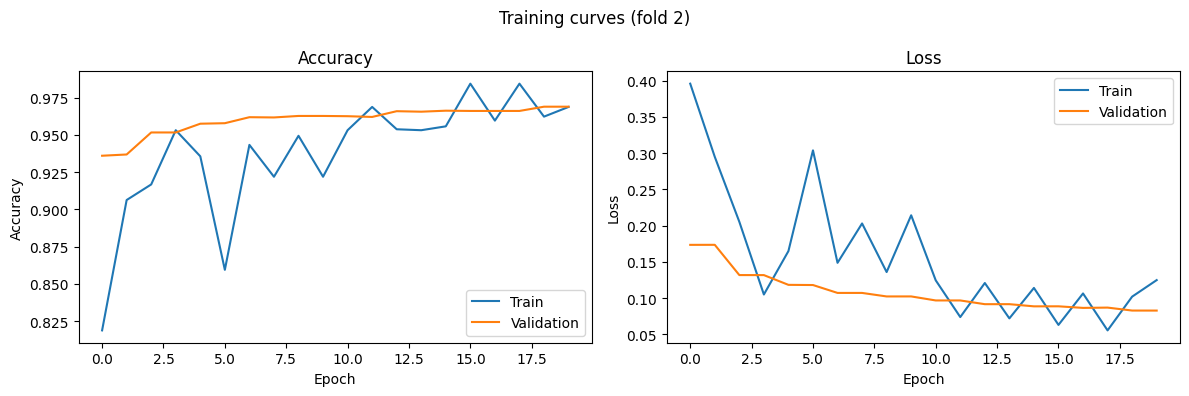


Fold 3/5
Found 24005 validated image filenames belonging to 2 classes.
Found 6001 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 118s 288ms/step - accuracy: 0.7244 - loss: 0.5625 - val_accuracy: 0.9414 - val_loss: 0.1709
Epoch 2/20
  1/375 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.8594 - loss: 0.3497

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.8594 - loss: 0.3497 - val_accuracy: 0.9415 - val_loss: 0.1707
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 99s 264ms/step - accuracy: 0.9161 - loss: 0.2161 - val_accuracy: 0.9528 - val_loss: 0.1313
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9219 - loss: 0.1907 - val_accuracy: 0.9528 - val_loss: 0.1309
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 100s 266ms/step - accuracy: 0.9342 - loss: 0.1717 - val_accuracy: 0.9617 - val_loss: 0.1118
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9375 - loss: 0.1627 - val_accuracy: 0.9617 - val_loss: 0.1117
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 100s 266ms/step - accuracy: 0.9442 - loss: 0.1532 - val_accuracy: 0.9635 - val_loss: 0.1031
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.9688 - loss: 0.1154 - val_accuracy: 0.9635 - val_loss: 0.1031
Epoch 9/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 100s 266ms/step - accuracy: 0.9498 - loss: 0.1356 - val_

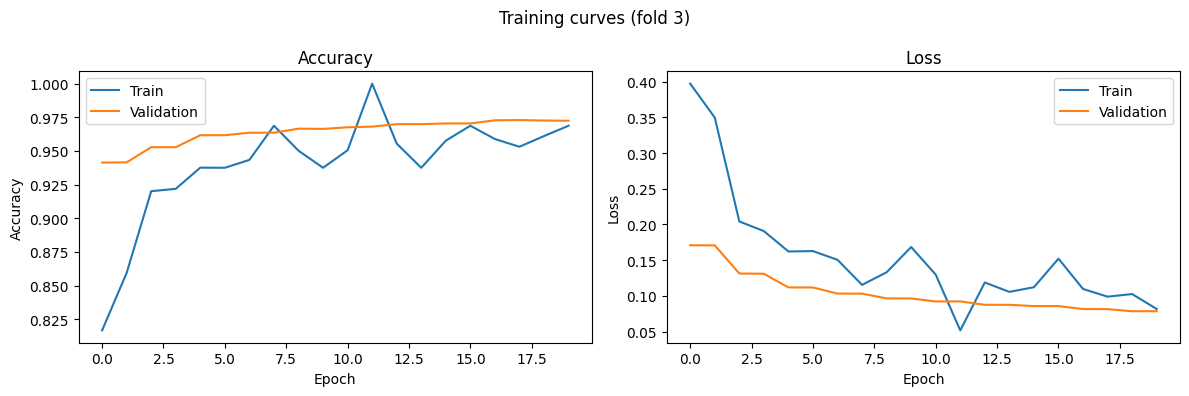


Fold 4/5
Found 24005 validated image filenames belonging to 2 classes.
Found 6001 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 118s 288ms/step - accuracy: 0.7356 - loss: 0.5573 - val_accuracy: 0.9388 - val_loss: 0.1804
Epoch 2/20
  1/375 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.8906 - loss: 0.2612

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.8906 - loss: 0.2612 - val_accuracy: 0.9392 - val_loss: 0.1785
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 100s 266ms/step - accuracy: 0.9097 - loss: 0.2220 - val_accuracy: 0.9555 - val_loss: 0.1243
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 52ms/step - accuracy: 0.9688 - loss: 0.1410 - val_accuracy: 0.9553 - val_loss: 0.1243
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 98s 262ms/step - accuracy: 0.9325 - loss: 0.1758 - val_accuracy: 0.9607 - val_loss: 0.1100
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.9375 - loss: 0.2029 - val_accuracy: 0.9609 - val_loss: 0.1096
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 100s 266ms/step - accuracy: 0.9407 - loss: 0.1556 - val_accuracy: 0.9654 - val_loss: 0.0989
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.9062 - loss: 0.2089 - val_accuracy: 0.9654 - val_loss: 0.0988
Epoch 9/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 101s 269ms/step - accuracy: 0.9478 - loss: 0.1374 - val_

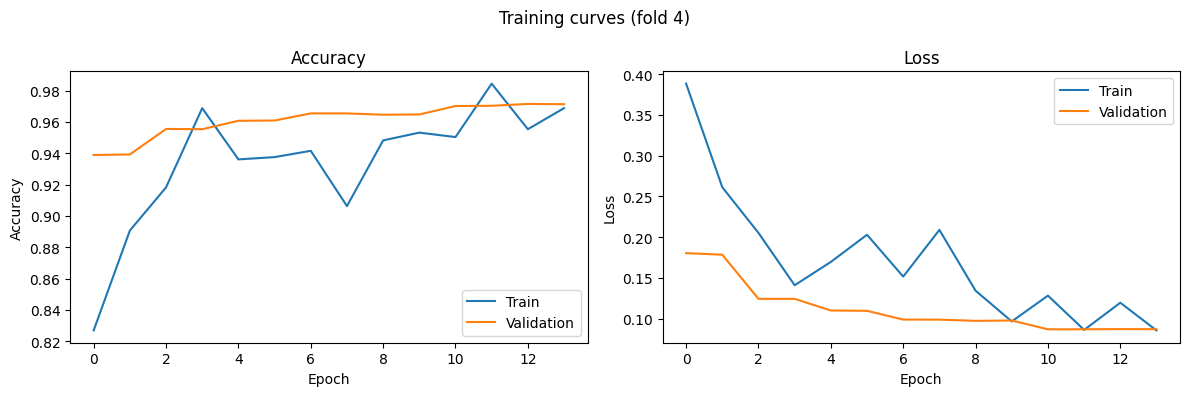


Fold 5/5
Found 24005 validated image filenames belonging to 2 classes.
Found 6001 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 119s 289ms/step - accuracy: 0.7157 - loss: 0.5710 - val_accuracy: 0.9402 - val_loss: 0.1761
Epoch 2/20
  1/375 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.8750 - loss: 0.3016

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - accuracy: 0.8750 - loss: 0.3016 - val_accuracy: 0.9405 - val_loss: 0.1756
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 99s 265ms/step - accuracy: 0.9123 - loss: 0.2172 - val_accuracy: 0.9590 - val_loss: 0.1278
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9375 - loss: 0.1828 - val_accuracy: 0.9592 - val_loss: 0.1278
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 101s 269ms/step - accuracy: 0.9326 - loss: 0.1769 - val_accuracy: 0.9624 - val_loss: 0.1129
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.9688 - loss: 0.1021 - val_accuracy: 0.9625 - val_loss: 0.1130
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 101s 270ms/step - accuracy: 0.9425 - loss: 0.1483 - val_accuracy: 0.9671 - val_loss: 0.1021
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9375 - loss: 0.2065 - val_accuracy: 0.9669 - val_loss: 0.1018
Epoch 9/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 100s 268ms/step - accuracy: 0.9468 - loss: 0.1414 - val_

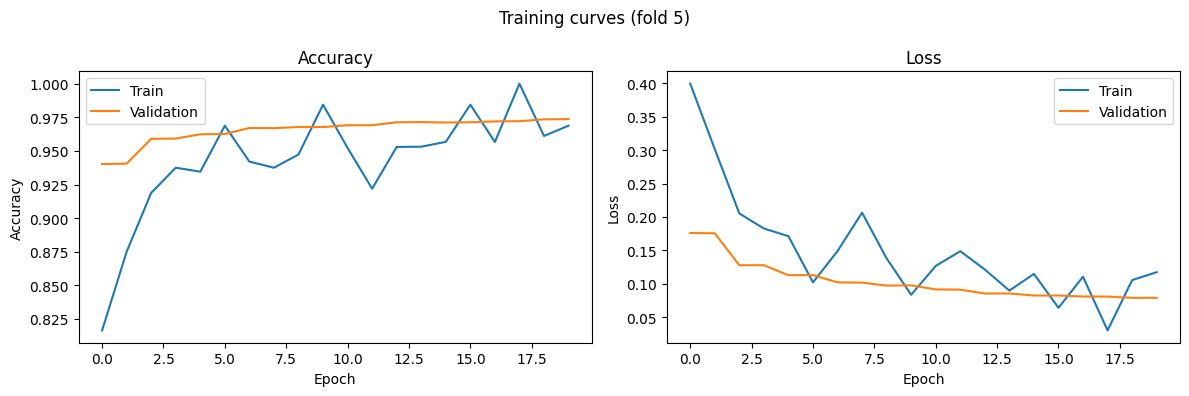

In [10]:
# 7. K-Fold cross-validation
import numpy as np  # place near other imports at top of file

k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
fold_accuracies = []

best_val_acc = 0.0
best_model = None

for fold, (train_idx, val_idx) in enumerate(skf.split(train_df['filename_only'], train_df['label'])):
    print(f"\nFold {fold + 1}/{k}")

    train_fold_df = train_df.iloc[train_idx].reset_index(drop=True)
    val_fold_df   = train_df.iloc[val_idx].reset_index(drop=True)

    train_generator = data_generator.flow_from_dataframe(
        dataframe=train_fold_df,
        directory=train_dir,
        x_col='filename_only',
        y_col='label',
        target_size=(IMAGE_RESIZE, IMAGE_RESIZE),
        batch_size=BATCH_SIZE_TRAINING,
        class_mode='binary',
        shuffle=True
    )

    validation_generator = data_generator.flow_from_dataframe(
        dataframe=val_fold_df,
        directory=train_dir,
        x_col='filename_only',
        y_col='label',
        target_size=(IMAGE_RESIZE, IMAGE_RESIZE),
        batch_size=BATCH_SIZE_VALIDATION,
        class_mode='binary',
        shuffle=False
    )

    steps_per_epoch  = max(1, len(train_fold_df) // BATCH_SIZE_TRAINING)
    validation_steps = max(1, len(val_fold_df) // BATCH_SIZE_VALIDATION)

    # Build ResNet50 model
    base_model = ResNet50(include_top=False, weights='imagenet')
    base_model.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=5e-5),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train
    history = model.fit(
        train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=NUM_EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_steps,
        callbacks=[early_stop],
        verbose=1
    )

    # Track validation accuracy
    val_acc = history.history['val_accuracy'][-1]
    fold_accuracies.append(val_acc)
    print(f"Validation accuracy (fold {fold + 1}): {val_acc:.4f}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model = model
        print(f"New best model from fold {fold + 1} with validation accuracy {val_acc:.4f}")

    # Training curves
    plt.figure(figsize=(12, 4))
    plt.suptitle(f"Training curves (fold {fold + 1})")

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [11]:
import numpy as np
print("\nCross-validation mean validation accuracy: {:.4f}".format(np.mean(fold_accuracies)))


Cross-validation mean validation accuracy: 0.9696


In [ ]:
import shutil

# Source path: trained model stored in Colab temporary directory
source_model_path = '/content/saved_models/best_resnet50_model.h5'

# Target path: copy to Google Drive for persistent storage
target_model_path = '/content/drive/MyDrive/resnet50_model_1.h5'

# Copy the model file
shutil.copy(source_model_path, target_model_path)
